# Project Description
Welcome to your first week as a Data Analyst at VentureInsight, a leading research firm that provides analytics and insights to venture capital firms and startup investors. Our clients rely on our data-driven recommendations to make multi-million dollar investment decisions.

You've joined our team at an exciting time! We've just acquired a comprehensive database tracking venture funds, startups, acquisitions, and key people in the industry. Your manager has assigned you a series of analysis tasks that will help shape our upcoming quarterly investment report.

The database structure is shown in the following ER diagram:
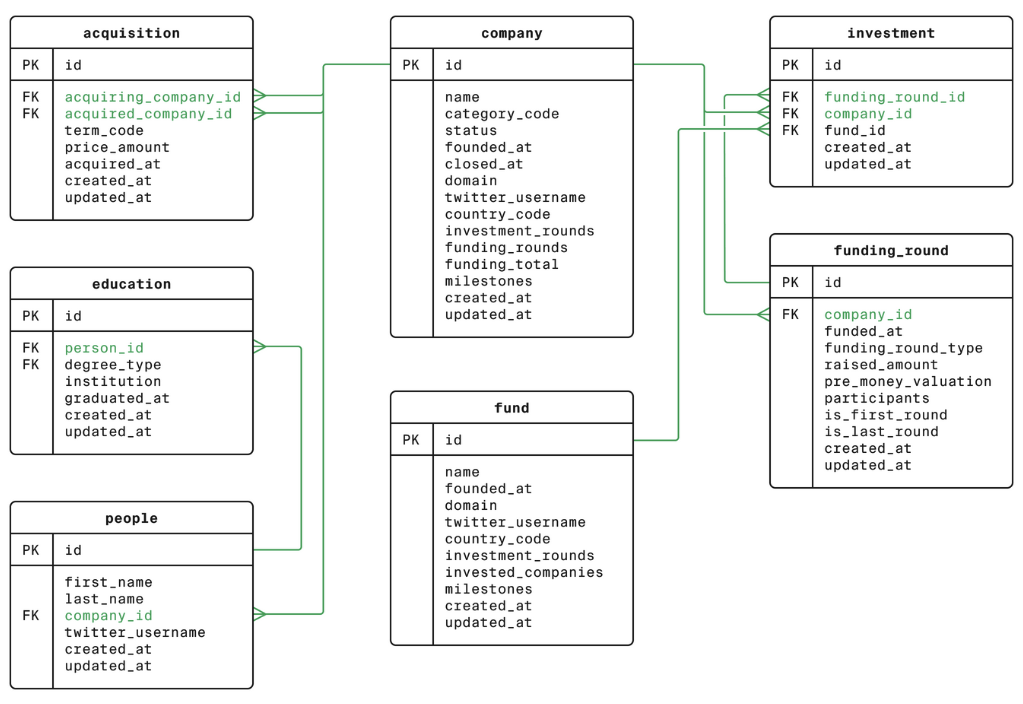

You'll be working with these key tables:
  - company ~ Information about startups (funding, status, category)
  - fund ~ Details about venture capital funds
  - funding_round ~ Data on investment rounds
  - investment ~ Records of specific investments
  - acquisition ~ Information about company acquisitions
  - people ~ Details about founders, employees, and investors
  - education ~ Educational backgrounds

# **Disclaimer!!**
I don't have access to the database that stores the values for these tables. With that being said, I will still be writing the code, but it won't be executable.

## 1. Startup Landscape Analysis
Before diving into specific analyses, your first task is to understand the overall startup landscape in our database. The executive team needs a snapshot of how many companies have failed (closed down) versus how many are still operating or have been acquired. This will help establish the baseline success rate in the startup ecosystem.

Calculate the number of companies that have been closed down.

In [ ]:
SELECT
    COUNT (status) AS num_closed_company
FROM
    company
WHERE
    status = 'closed';

## 2. Sector Analysis for US Investors
One of our major clients, a US-based VC firm, is considering investments in the media and news space. They've asked us to provide data on how much funding news-related companies from the USA have raised historically, to help them benchmark appropriate investment amounts.

Print the amount of money news-related companies from the USA have raised. Use data from the company table. Sort the resulting table by the funding_total field in descending order to see the most well-funded companies first.

In [ ]:
SELECT
    funding_total
FROM
    company
WHERE
    country_code = 'USA'
    AND category_code = 'news'
ORDER BY
    funding_total DESC;

## 3. Analyzing Cash Acquisitions
Our quarterly report includes a section on acquisition trends. The team needs to understand the volume of cash-based acquisitions (as opposed to stock deals) that occurred during the recent post-recession period (2011-2013). This data will help identify whether companies were primarily acquired with cash or other payment methods during this economic recovery period.

Find the total amount of company acquisitions in US dollars. Select only the deals made in cash from 2011 to 2013, inclusive.

In [ ]:
SELECT
    SUM(price_amount)
FROM
    acquisition
WHERE
    CAST(acquired_at AS DATE) >= '2011-01-01'
    AND CAST(acquired_at AS DATE) < '2014-01-01'
    AND term_code = 'cash';

## 4. Identifying Industry Influencers

Our marketing team is preparing an outreach campaign to industry influencers with strong social media presence. They're particularly interested in individuals who brand themselves with "Silver" in their Twitter handles, as this group seems to have significant industry clout. We need to identify these individuals for potential partnerships.

Print the first and last names of people whose Twitter usernames start with 'Silver'. Include their Twitter usernames in the results.

In [ ]:
SELECT
    first_name,
    last_name,
    twitter_username
FROM
    people
WHERE
    twitter_username LIKE 'Silver%'
ORDER BY
    twitter_username;

## 5. Finding Finance Influencers

Following your initial influencer analysis, the marketing team has refined their focus. They're now looking specifically for finance-focused influencers (those with "money" in their Twitter handles) whose last names start with 'K'. This more targeted approach will help them connect with relevant industry voices for our upcoming FinTech investment report.

Print all information about people whose Twitter usernames include the word 'money' somewhere in their name and whose last names start with 'K'.

In [ ]:
SELECT *
FROM people
WHERE
    twitter_username LIKE '%money%'
    AND last_name LIKE 'K%';

## 6. Geographic Investment Analysis

Our global investment clients need to understand funding patterns across different countries. They want to identify which countries attract the most venture capital to help them decide where to focus their international investment strategies. This geographic breakdown will be a key feature in our quarterly global trends report.

For each country, calculate the total amount of money raised by companies registered there. The country code will tell you where each company is registered. Sort the data by sum in descending order to highlight the countries with the most funding.

In [ ]:
SELECT
    country_code,
    SUM(funding_total) AS total_country_funding
FROM
    company
GROUP BY
    country_code
ORDER BY
    total_country_funding DESC;

## 7. Funding Round Volatility Analysis

Our risk analysis team is examining volatility in funding rounds. They're specifically interested in dates where there was significant variation between the smallest and largest rounds. This indicates days when both very small and very large companies were receiving funding, which could signal unusual market activity. They also want to exclude days where some companies received no funding at all, as that skews the analysis.

Create a table showing the highest and lowest amount of money raised for each date in the funding_round table. Include the dates in your results. The resulting table should only have records where the lowest value is not equal to zero or to the highest value.

In [ ]:
SELECT
    funded_at,
    MIN(raised_amount),
    MAX(raised_amount)
FROM
    funding_round
GROUP BY
    funded_at
HAVING
    MIN(raised_amount) > 0
    AND MIN(raised_amount) != MAX(raised_amount);

## 8. Fund Activity Classification

For our investor clients, understanding the activity level of different venture funds helps them identify potential co-investment partners. Funds that invest in many companies are often seen as having broader networks, while those with fewer investments might have deeper industry expertise. We need to categorize funds by their activity level to help our clients find appropriate partners.

Create a field with three categories:

- high_activity — for funds that invest in a hundred or more companies
- middle_activity — for funds that invest in between twenty (inclusive) to a hundred companies (exclusive)
- low_activity — for funds that invest in fewer than twenty companies

Print all fields from the fund table and the new field with categories.

In [ ]:
SELECT *,
    CASE
        WHEN invested_companies >= 100 THEN 'high_activity'
        WHEN invested_companies >= 20 AND invested_companies < 100 THEN 'middle_activity'
        WHEN invested_companies < 20 THEN 'low_activity'
    ELSE 'no_activity'
    END AS investment_activity
FROM fund;

## 9. Investment Strategy by Fund Activity

Building on our fund activity classification, our research team wants to understand how a fund's investment approach changes based on its activity level. Specifically, we want to know if funds that invest in more companies tend to participate in more funding rounds per company. This will help our clients understand different fund strategies and how broadly or deeply funds typically engage with their portfolio companies.

For each activity category you assigned in the previous task, calculate the average number of funding rounds the fund participated in. Round it to the nearest whole number. Print the categories and the average number of funding rounds. Sort the table by the average in ascending order.

In [ ]:
WITH categorization AS (SELECT
    *,
    CASE
        WHEN invested_companies >= 100 THEN 'high_activity'
        WHEN invested_companies >= 20 AND invested_companies < 100 THEN 'middle_activity'
        WHEN invested_companies < 20 THEN 'low_activity'
    ELSE 'no_activity'
    END AS investment_activity
FROM fund)


SELECT
    investment_activity,
    CAST(AVG(investment_rounds) AS INT)

FROM categorization
GROUP BY
    investment_activity
ORDER BY
    AVG(investment_rounds);

## 10. Employee Education Impact on Startup Success

A heated debate has emerged among our clients about whether the educational background of startup employees correlates with company success. Some argue that highly educated teams are more likely to succeed, while others claim education has little impact. To settle this debate with data, we need to compare the education levels of employees at successful companies versus those that closed after limited funding.

We'll start by identifying companies that closed after just one funding round, then analyze the educational backgrounds of their employees.

First, make a list with the names of companies that closed down and had only one funding round while they existed.

Then, find the employees who worked at these companies and join with the education table to analyze their degree types.

Finally, calculate the average number of degrees per employee at these failed startups.

In [ ]:
SELECT
    AVG(degree_count)
FROM(
    SELECT
        COUNT(education.degree_type) AS degree_count
    FROM
        people
    INNER JOIN education ON people.id = education.person_id
    WHERE
        people.company_id IN (
            SELECT
                id
            FROM
                company
            WHERE
                status = 'closed'
                AND id IN (
                    SELECT
                        company_id
                    FROM
                        funding_round
                    WHERE
                        is_first_round = 1
                        AND is_last_round = 1
                )
        )
    GROUP BY
        people.id
    ) AS avg_degree;